<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/DownloadingDataYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 5.5MB 11.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=877def291d1315e27f0d9b04a841e2afffe5d0074680457b8a8f85508bfac3ce
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp37-none-any.whl size=15192 sha256=9a497500a3f753d872a3e1f9ebe6f779ee45979c84c4773f3849f1b24f2f7a4e
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

In [3]:
#companies = ['TSLA',"AMZN",'WMT','GOOG',"WEN","TGT",'T','TMUS', 'VZ','CTSH',"ACN"]

companies = [             
'MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AAP', 'AMD', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB',
'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 
'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON','APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY',
'BKR', 'BLL', 'BAC', 'BAX', 'BDX', 'BBY', 'BIO', 'BIIB','BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'CHRW', 'COG', 'CDNS', 
'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'LUMN','CERN','CF','SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 
'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CME', 'CMS', 'KO', 'CTSH','CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CPRT', 
'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN','DXCM','FANG','DLR', 'DFS', 'DISCA', 
'T','DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV','DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY','ECL','EIX','EW','EA','EMR', 'ETR', 'EOG', 
'EFX', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FRC', 'FE', 'FISV', 'FLT', 'FLIR', 'FLS', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'BEN', 
'FCX', 'GPS', 'GRMN','IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL', 'GS', 'GWW', 'H', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 
'HSIC', 'HES', 'HPE', 'HLT', 'HFC', 'HOLX', 'HD', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 
'TT', 'INTC', 'IP', 'IPG', 'INT', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'SJM', 'JCI', 'JPM', 'JNPR','K','KEY','LW','LVS',
'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'M', 'MRO', 'MPC','MKTX','MAR','MMC','MLM', 'MAS', 'MA', 
'MXIM', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MGM', 'MCHP', 'M', 'MSFT', 'MAA', 'NOC', 'NLOK', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'ORLY',
'OXY','ODFL','OMC','OKE','ORCL', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI','PRGO','PFE','PM','PSX','PNW','PXD', 
'PNC','PPG','PPL','PFG','PG','PGR','PLD','PEG','PSA','PHM','PVH','QRVO','QCOM','PWR', 'DGX', 'RL', 'RJF', 'SLG', 'SNA', 'SO','LUV','SWK','SBUX',
'STT','STE','SYK','SIVB','SYF','SNPS','SYY','TMUS','TROW','TTWO', 'TPR', 'TGT', 'TEL', 'FTI','TDY','TFX','TXN','TXT','TDG','TFC','TWTR','TYL',
'TSN', 'USB', 'UDR', 'ULTA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VAR', 'VTR', 'VRSN','VRSK','VZ','VRTX','VFC','V','VNO', 
'VMC', 'WRB', 'WAB', 'WBA', 'WMT', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'W', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 
'XRX', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS'
]

finalData=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start='2018-01-02', 
                      end='2021-02-22', 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Volume',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Close': company})
  tmp = tsla_df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(companies)):
  finalData = finalData.rename(columns={i: companies[i]})




finalData['Date'] = finalData.index
col_name="Date"
first_col = finalData.pop(col_name)
finalData.insert(0, col_name, first_col)
finalData.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv', index = False, header=True)
finalData

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,...,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
2018-01-02,2018-01-02,235.639999,61.529999,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,106.089996,10.980000,10.880000,43.985001,67.599998,165.509995,65.559998,75.010002,131.529999,129.929993,124.050003,224.619995,79.910004,42.110001,101.919998,1073.209961,70.739998,1189.010010,11.80,58.389999,52.990002,72.410004,98.940002,59.500000,141.130005,89.080002,169.910004,94.040001,72.750000,177.000000,87.800003,...,115.599998,54.860001,92.800003,110.980003,59.759998,109.470001,95.830002,53.529999,152.910004,70.075333,114.510002,77.320000,131.869995,46.693333,82.930000,74.949997,98.589996,86.099998,195.690002,65.769997,61.090000,64.029999,99.500000,81.379997,81.019997,64.709999,35.299999,167.990005,31.139999,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,103.709999,124.059998,50.700001,71.769997
2018-01-03,2018-01-03,235.630005,61.900002,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,107.050003,11.550000,10.870000,44.115002,69.320000,166.410004,65.940002,74.660004,131.789993,129.320007,124.949997,231.199997,80.250000,41.740002,101.980003,1091.520020,70.480003,1204.199951,11.80,58.090000,52.340000,71.800003,99.550003,60.160000,141.679993,88.449997,169.070007,94.389999,73.389999,180.339996,88.940002,...,113.389999,55.259998,93.290001,111.309998,60.119999,110.900002,95.550003,52.430000,152.009995,69.472694,115.650002,77.099998,134.289993,46.306667,82.260002,75.510002,99.449997,87.349998,197.770004,65.540001,61.560001,64.139999,99.620003,82.669998,78.449997,65.400002,35.610001,168.839996,32.000000,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,105.769997,124.919998,50.639999,72.099998
2018-01-04,2018-01-04,238.710007,62.189999,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,111.000000,12.120000,10.830000,44.570000,68.800003,167.050003,65.599998,73.849998,130.220001,126.739998,122.690002,233.300003,81.370003,41.250000,100.800003,1095.760010,70.199997,1209.589966,11.80,57.430000,52.669998,70.949997,100.849998,60.400002,139.610001,87.610001,169.690002,94.180000,73.980003,179.580002,88.629997,...,112.790001,55.750000,93.589996,109.860001,58.650002,111.470001,96.029999,52.599998,153.070007,71.054611,116.080002,74.800003,133.380005,46.493332,83.370003,71.599998,99.540001,88.099998,199.660004,65.309998,62.330002,62.759998,99.589996,82.169998,79.300003,67.040001,35.320000,168.820007,32.549999,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,107.860001,124.739998,50.849998,72.529999
2018-01-05,2018-01-05,240.570007,62.990002,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,112.180000,11.880000,10.870000,44.865002,69.900002,168.449997,65.830002,73.739998,131.720001,127.000000,122.800003,241.070007,81.570000,41.080002,101.870003,1110.290039,70.400002,1229.140015,11.80,57.389999,52.650002,70.800003,101.080002,60.650002,140.509995,86.750000,170.270004,95.320000,73.790001,180.649994,89.709999,...,111.970001,55.990002,94.029999,110.870003,58.349998,113.000000,96.879997,52.480000,155.690002,71.280602,118.860001,75.440002,131.899994,46.299999,81.830002,72.919998,100.129997,87.989998,202.229996,64.870003,62.750000,62.369999,100.839996,82.690002,80.750000,67.309998,35.270000,168.479996,32.459999,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,109.540001,125.980003,50.869999,73.360001
2018-01-08,2018-01-08,239.789993,63.290001,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,111.389999,12.280000,10.870000,44.980000,70.050003,168.630005,65.879997,72.750000,137.449997,127.279999,119.699997,248.899994,81.239998,41.540001,101.389999,1114.209961,70.309998,1246

In [4]:
#Check if any Columns have empty values(NAN)
finalData.sort_values(by=['Date'])
finalData.columns[finalData.isna().any()].tolist()
print(finalData)

                 Date         MMM        AOS  ...         ZBH       ZION         ZTS
2018-01-02 2018-01-02  235.639999  61.529999  ...  124.059998  50.700001   71.769997
2018-01-03 2018-01-03  235.630005  61.900002  ...  124.919998  50.639999   72.099998
2018-01-04 2018-01-04  238.710007  62.189999  ...  124.739998  50.849998   72.529999
2018-01-05 2018-01-05  240.570007  62.990002  ...  125.980003  50.869999   73.360001
2018-01-08 2018-01-08  239.789993  63.290001  ...  126.220001  50.619999   74.239998
...               ...         ...        ...  ...         ...        ...         ...
2021-02-12 2021-02-12  178.699997  60.369999  ...  161.380005  49.580002  166.710007
2021-02-16 2021-02-16  176.630005  59.119999  ...  160.369995  51.299999  166.320007
2021-02-17 2021-02-17  176.649994  59.259998  ...  158.580002  50.639999  168.899994
2021-02-18 2021-02-18  179.369995  58.150002  ...  156.809998  50.029999  167.949997
2021-02-19 2021-02-19  176.539993  59.639999  ...  156.669998  51

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
(789, 7)


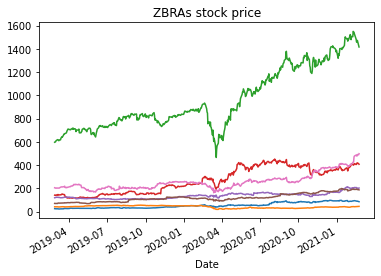

In [5]:
goodCompanies = ['AMD','AIG','CMG','DXCM','LLY','TGT','ZBRA']
for company in goodCompanies[:len(goodCompanies)]:

  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="2Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))

print(finalData[goodCompanies].shape)

In [6]:
import plotly.express as px
goodCompanies = ['Date','AMD','AIG','CMG','DXCM','LLY','TGT','ZBRA']

df = finalData[goodCompanies]

# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()
# plot interactive chart for stocks data
# plot interactive chart for stocks data
interactive_plot(df, 'Stock Prices')

In [12]:
finalDataEnd = finalData[(finalData['Date'] >= '2020-12-29') & (finalData['Date'] <= '2021-06-10')]


In [19]:
youtubeCompanies = ['Date','CTAS','MAR']
finalDataEnd[youtubeCompanies]

,Date,CTAS,MAR
2020-12-29,2020-12-29,347.369995,129.000000
2020-12-30,2020-12-30,350.230011,130.470001
2020-12-31,2020-12-31,353.459991,131.919998
2021-01-04,2021-01-04,343.600006,124.769997
2021-01-05,2021-01-05,348.890015,126.089996
2021-01-06,2021-01-06,350.989990,129.389999
2021-01-07,2021-01-07,355.059998,130.350006
2021-01-08,2021-01-08,350.149994,129.690002
2021-01-11,2021-01-11,339.500000,128.660004
2021-01-12,2021-01-12,339.470001,127.389999
